<a href="https://colab.research.google.com/github/rahulll-gif/task1/blob/main/task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please upload the dataset file (e.g., archive3 or archive3.csv):


Saving archive (3).zip to archive (3) (6).zip
Uploaded files: ['archive (3) (6).zip']
Found a zip file: archive (3) (6).zip. Extracting...
Extracted files: ['data.csv']
Found CSV file: /content/extracted_files/data.csv
Dataset loaded successfully!
First few rows of the dataset:
          id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.1

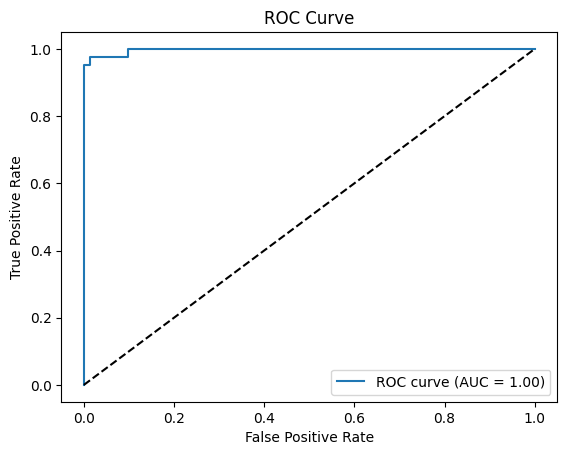

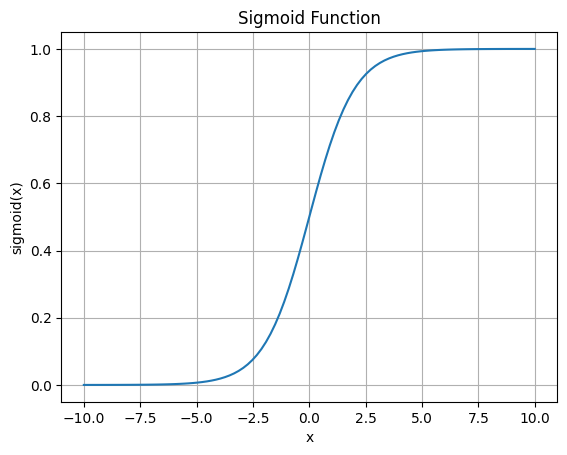

Optimal Threshold: 0.47898103204183223
Confusion Matrix with Optimal Threshold:
 [[70  1]
 [ 1 42]]


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from google.colab import files
import os
import zipfile

print("Please upload the dataset file (e.g., archive3 or archive3.csv):")
uploaded = files.upload()

print("Uploaded files:", list(uploaded.keys()))

uploaded_files = list(uploaded.keys())
csv_file = None

for file_name in uploaded_files:
    if file_name.endswith('.zip'):
        print(f"Found a zip file: {file_name}. Extracting...")
        with zipfile.ZipFile(file_name, 'r') as zip_ref:
            zip_ref.extractall('/content/extracted_files')
        extracted_files = os.listdir('/content/extracted_files')
        print("Extracted files:", extracted_files)
        for extracted_file in extracted_files:
            if extracted_file.endswith('.csv'):
                csv_file = f"/content/extracted_files/{extracted_file}"
                print(f"Found CSV file: {csv_file}")
                break
    elif file_name.endswith('.csv'):
        csv_file = file_name
        print(f"Found CSV file: {csv_file}")
        break

if csv_file is None:
    raise FileNotFoundError("No .csv file found in the uploaded files or extracted archive.")

data = pd.read_csv(csv_file)
print("Dataset loaded successfully!")
print("First few rows of the dataset:\n", data.head())

print("Dataset columns:", data.columns)

if 'diagnosis' in data.columns:
    X = data.drop('diagnosis', axis=1)
    y = data['diagnosis'].map({'M': 1, 'B': 0})
else:
    raise KeyError("The 'diagnosis' column was not found in the dataset. Please check the column names and adjust the code.")

# Select only numeric columns and handle NaN values
X = X.select_dtypes(include=[np.number])
X = X.fillna(X.mean())
# Drop any columns that still have NaN values after filling
X = X.dropna(axis=1)

# Ensure there are features to work with
if X.empty:
    raise ValueError("No numeric features available after preprocessing. Check the dataset for non-numeric columns or persistent NaN values.")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Confusion Matrix:\n", conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("ROC-AUC Score:", roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.savefig('roc_curve.png')
plt.show()

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 100)
plt.figure()
plt.plot(x, sigmoid(x))
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.grid(True)
plt.savefig('sigmoid_function.png')
plt.show()

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal Threshold:", optimal_threshold)

y_pred_custom = (y_pred_proba >= optimal_threshold).astype(int)
print("Confusion Matrix with Optimal Threshold:\n", confusion_matrix(y_test, y_pred_custom))